# Heap Sort

## Introduction
***
Within this Jupyter notebook, I will discuss the idea of a <b>Heapsort sorting algorithm</b> and the reason as to why I am exploring this particular field by detailing the following:
<ul>
    <li>An explanation of Heapsort</li>
    <li>Code implementation of Heapsort in-action</li>
    <li>Computational complexity of Heapsort</li>
    <li>Application of Graph Theory in Heapsort</li>
</ul>
    

## Heapsort: Explanation
***
### Data Structures and Algorithms
***
<p>Before discussing what a Heapsort algorithm is, it is important to first know what algorithms are in relevance to the field of Computer Science and Graph Theory. According to the <i>Encyclopedia Britannica</i>, an algorithm can be defined as <a href="https://www.britannica.com/science/computer-science/Algorithms-and-complexity">"a specific procedure for solving a well-defined computational problem."</a> <sup><a href="#references">[1]</a></sup></p>

<p>Algorithms are what defines how we solve a particular problem and the approach in which we take in order to implement the solution. In this particular context, algorithms are used to define <b>data structures</b> and their operations. <b>Data structures</b> are collections of data that are organised in such a manner which allows for us to efficiently process its contents, as described on the <a href="https://isaaccomputerscience.org/concepts/dsa_datastruct_definitions?examBoard=all&stage=all"><i>Isaac Computer Science</i></a> website.<sup><a href="#references">[2]</a></sup></p>

<p>Algorithms determine the way in which the data is organised and used within these particular structures. Heap Sort is one of the many sorting algorithms in which is used within the field of programming and is considered to be one of the most efficient in accordance to its performance, which is described in Big O notation. I will discuss this notation in the computational complexity section of this notebook in further detail.</p>

<p>Why are data structures important and why is it a noteworthy point of discussion? The significance of data structures and their algorithms inherently lies in the <u>significance of the data itself</u>. Data is invaluable to us as people, and especially as software developers. Therefore, having an efficient manner in organising and retrieving such data is of utmost importance to us.</p>

<p>Data structures and algorithms are considered to be <a href="https://www.synergisticit.com/data-structures-and-algorithms/">"interrelated"</a><sup><a href="#references">[3]</a></sup>. Using the correct data structure, alongside the algorithm in which applies to it, can significantly improve performance in all aspects. Any opportunity to increase performance is always a goal in which we strive to achieve.</p>

### Heap
***
<p>Now that we have briefly discussed what data structures and algorithms are, let us begin discussing the Heapsort algorithm further.</p>

<p>To understand the exact concept of a Heapsort, we must first begin by discussing what a Heap is. Described by <i>Goodrich (et al.)</i>, Heaps are <b>binary trees</b> (each node has at most 2 children) which satisfy two properties. A <i>relational property</i>, which describes the way in which nodes are stored, and a <i>structural property</i>, which defines the shape of the heap itself.<sup><a href="#references">[4]</a></sup></p>

#### Relational Property
<p>The relational property of a heap can be described as follows:</p>

<ul>
  <li>The parent node P is greater than or equal to a child node C (Max Heap)</li>
  <li>The parent node P is less than or equal to a child node C (Min Heap)</li>
</ul> 

<p>This guarentees that the node at the top of the tree (described as a root node), is either the smallest element or the largest within the data structure. This allows for efficient sorting and retrieval of data. In implementing the Heap Sort algorithm, a <u>max heap</u> is used, which I will discuss further in the relevant section.</p>

<img></img>

#### Structural Property
<p>The structural property in which a binary tree must satisfy is that it must be a <b>complete</b> binary tree. 
A binary tree of height $h$ is considered complete if all levels up to $h$ has the maximal nodes possible. The final level $h$ may  either have the max amount of nodes, or have the nodes reside in the leftmost possible position of $h$ otherwise.<sup><a href="#references">[4]</a></sup></p>

<p>Within a complete binary tree, the number of internal nodes (nodes which have 1 or more children<sup><a href="#references">[5]</a></sup>) can be showcased by $(n/2)$ where $n$ is the number of nodes within the tree.<sup><a href="#references">[6]</a></sup></p>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d9/Complete_binary2.svg/1920px-Complete_binary2.svg.png" height="300" width="300"><center><i>Example of a <a href="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d9/Complete_binary2.svg/1920px-Complete_binary2.svg.png">'complete'</a> binary tree (not full)</i></center></img>

In [1]:
# For example, the above 'complete' binary tree has 12 nodes alltogether
# We can determine the number of internal nodes by the following (nodes with atleast 1 child node):
n = 12
f = n / 2

# Therefore the number of internal nodes is 6 
print(int(f))

6


### Heapsort Algorithm
***
<p>Now that we have a better understanding as to what exactly a Heap is, we can begin to explore the algorithm in which implements the Heap data structure, and how, in further detail.</p>

<p>Heapsort can be described as a <a href="syllabus.cs.manchester.ac.uk/ugt/2019/COMP26120/SortingTool/heap_sort_info.html">"comparison-based"</a><sup><a href="#references">[8]</a></sup> sorting algorithm, due to its implementation of the binary heap data structure. The reason that Heap sort can be described as such is due to the relational property in which we touched upon when discussing the properties in which a Heap must satisfy. Given a list $L$:</p>

<p>Max Heap: $L$[parent($i$)] >= $L$[$i$]<br>
Min Heap: $L$[parent($i$)] <= $L$[$i$] <sup><a href="#references">[9]</a></sup></p>

<p>When implementing the heapsort algorithm, a max heap is generally used.</p>

### Heapsort: Steps
<p>The steps in which are taken when implementing the heapsort can be broken into two main parts. Firstly, the unsorted list is turned into a max heap. Secondly,the algorithm then proceeds to create a sorted array, by continously retrieving the <b>largest element</b> of the heap (being the root node), and inserting it into the array.<sup><a href="#references">[9]</a></sup></p>

<p> These two aspects can be broken down into the following steps, which has been outlined by <i>Prof. Srini Devadas</i> in his one of his lectures on Heapsort<sup><a href="#references">[10]</a></sup>, in relation to sorting heap array $L$: </p>

<ol>
    <li>Build a max-heap from an unordered array</li>
    <li>Retrieve the largest element (root node, due to being a max-heap)</li>
    <li>Swap the last element of the list ($L(n)$) with the first element ($L(0)$)</li>
    <li>Decrease the size of the heap by 1</li>
    <li>Due to the new root potentially violating the relational property of the max heap ($P >= C$), we must correct this by sifting the element down the list to its correct positioning (this is commonly called "max-heapify")</li>
    <li>Repeat from step 2 until the heap is empty</li>
</ol>

### Max-Heapify
<p>What exactly is a "max-heapify" and why is it important in the case of the heapsort algorithm? Well, as mentioned earlier, this operation ensures that the max-heap maintains the relational property in which it must satisfy, by moving the newly inserted element into its correct placing.</p>

<p>This can be showcased better in <b>pseudocode</b>, which allows for us to describe the steps with common coding conventions, all the while being in a human-readable format.</p>



<b>Max-Heapify(L, $i$)<sup><a href="#references">[10]</a></sup></b>
***
    
<p><i><u>Currently points at the left child and right child of the specified index</u></i></p>
<p>$lc$ = left(i)<br>
$rc$ = right(i)<br><br>

<p><i><u>If: The current left child is less than the heap size and the left child is greater than the parent node</u></i></p>
if ($lc$ <=heap-size(L) and L[$lc$] > L[$i$])<br>
    &emsp; then largest = $lc$ else largest = $i$<br><br>

<p><i><u>If: The current right child is less than the heap size and the right child is greater than the current largest node</u></i></p>
if ($rc$ <=heap-size(L) and L[$rc$] > L[$largest$])<br>
    &emsp; then largest = $rc$<br><br>

<p><i><u>If: The current largest node is not the current index</u></i></p> 
if largest $!= i$<br>
    &emsp; then swap L[$i$] and L[largest]<br>
    <p><i><u>Begin the process again, by checking the children of the current largest node</u></i></p> 
    &emsp; Max-Heapify(L,largest)</p>

<p>This process above can be used to ensure that no violation of the relational property of the max-heap occurs, simply by comparing the left child and the right child of the root node initially, and if any violation is found, swapping the elements accordingly, and then comparing the children of the element which was found to be in violation.</p>

<p>For max-heapify to operate, <u>we must be able to retrieve the left child and right child (if present) of a given element within the heap.</u></p>

### Determining children of a given node
<p>For visualisation purposes, I will showcase an already sorted max-heap, to demonstrate how to determine the parent, left child, and right child of a given element within a heap.</p>


In [2]:
# We first import the necessary libraries which are needed for implementing visual graphs in Python

# Networkx: Allows for the creation and manipulation of complex networks (https://networkx.org/)
import networkx as nx

# Math: A Python module which allows for us to use functions such as power and logarithmic functions 
# (https://docs.python.org/3/library/math.html#module-math)
import math

# Function: Draws a tree graph based on a given list
# References the implementation worked on within the lab content 
# (https://github.com/ianmcloughlin/heapsort/blob/main/heapsort.ipynb)

def drawheap(L):
  # Create a complete binary tree, based on the given list.
  T = nx.balanced_tree(2, math.floor(math.log(len(L), 2)))
  # Remove any nodes which are beyond the current length of the list
  T.remove_nodes_from(list(T.nodes)[len(L):])
  # Relabel the nodes within the tree with the elements within the list
  T = nx.relabel_nodes(T, dict(zip(T.nodes, L)), copy=True)
  # Get nice positions for the nodes in the picture.
  pos = nx.drawing.nx_pydot.graphviz_layout(T, prog="dot")
  # Draw the graph.
  nx.draw(T, pos, with_labels=True, node_color='lightgrey', node_size=1600, font_size=32)

In [3]:
# To demonstrate and visualize how to determine a given nodes children, we must first provide a list
# which is already sorted
L = [20,16,12,10,8,6,5,3,2,1]

# Display the contents of the list
print(L)

[20, 16, 12, 10, 8, 6, 5, 3, 2, 1]


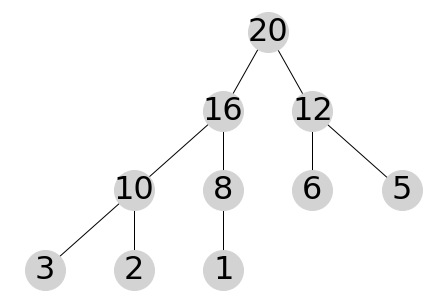

In [4]:
# Draw the graph
drawheap(L)

<ul>
    <sup><a href="#references">[10]</a></sup>
    <li>Root: $i = 1$</li>
    <li>Parent(i): $i/2$</li>
    <li>Left Child(i): $2i$</li>
    <li>Right Child(i): $2i + 1$</li>
</ul>

In [5]:
# We can determine the specified elements above using these functions

# Parent of 16 
# 16 is the second element in the array, but is positioned in index 1, therfore I am adding an additional value
# to the index count
p = ((L.index(16)) + 1) / 2
print("Parent of 16 is:",L[int(p-1)])

# Left child of 16
lChild = 2 * (L.index(16)) + 1
print("Left child of 16 is:",L[int(lChild)])

# Right child of 16
rChild = 2 * ((L.index(16)) + 1)
print("Right child of 16 is:",L[int(rChild)])

Parent of 16 is: 20
Left child of 16 is: 10
Right child of 16 is: 8


This allows us to <u>efficiently retrieve the values of a given nodes children</u> and determine if the current node needs to be sifted down in the current heap, to ensure it does not violate the max-heap property.


## Python: Implementation of HeapSort
***
Now that we've introduced the concept of a Heapsort, we can begin to demonstrate it's concept in code. The demonstrated implementation of HeapSort below has been inspired heavily by the following <a href="https://brilliant.org/wiki/heap-sort/">implementation</a>. However, I have re-arranged some elements to make it more compact and to showcase my own understanding of the code in-action. 

Throughout each section of code, I will describe the purpose of each line and run through it step-by-step, similiar to how was done when discussing the intricacies of Heapsort in pseudocode.

In [6]:
# Function: Ensures that the list satisfies the properties of a max-heap
def max_heapify(L,heap_length,i):
    
    # Retrieve the current children of the given node i
    leftChild = 2 * i + 1
    rightChild = 2 * i + 2
    
    # Initialize the largest current element to the given node i
    largest = i
    
    # If: The left child exists within the array and its value is greater than the current largest element (parent node)
    if leftChild < heap_length and L[leftChild] > L[largest]:
        # Set the left child as the largest element
        largest = leftChild
    
    # If: The right child exists within the array and its value is greater than the current largest element..
    if rightChild < heap_length and L[rightChild] > L[largest]:
          # Set the right child as the largest element
        largest = rightChild
    
    # If: The largest element between the parent node and its children is not the parent node...
    if largest != i:
        # Swap the parent node and the current largest element
        L[i], L[largest] = L[largest], L[i]
        
        # Check the list again to determine if there are any more violations
        max_heapify(L, heap_length, largest)



# Function: Used to create a max-heap from an unorderd array
def heapsort(L):
    
    # Step 1: Build a max-heap from an unordered array
    
    # Retrieve the given size of the array
    heap_length = len(L)
    
    # For-each internal node in the array (determined by n/2)
    for i in range (int(heap_length/2),-1,-1):
        # Check to see if the current internal node is in the correct placing 
        max_heapify(L,heap_length, i)
        
    # For-each element remaining in the heap..
    for i in range(heap_length-1,0,-1):

            # Step 2: Swap the current element (last element) of the list with the first element
            L[0], L[i] = L[i], L[0]

            # Step 3: Reduce the size of the heap by 1
            heap_length -= 1

            # Step 4: Fix the max-heap to prevent violation of the max-heap property
            max_heapify(L, heap_length, 0)
            
            # Step 5: Repeat this process until the heap is empty

Now that we have provided an implementation of the Heapsort algorithm, let us put it to the test, with a randomly generated list

In [7]:
# Random: Module from Pythons standard library, which allows us to generate pseudo-random numbers etc.
import random

# Random.sample function: Returns a list containing 10 unique elements, ranging from 1 - 30
# Documentation: https://docs.python.org/3/library/random.html
L = random.sample(range(1,30), 10)
L

[18, 5, 13, 24, 21, 12, 2, 7, 6, 10]

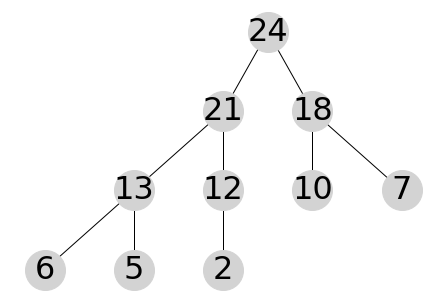

In [8]:
# Sort the unordered array into a max-heap by using our implemented Heapsort algorithm
heapsort(L)

# Reverse the list in order to draw a visual representation of a max-heap
L.reverse()

# Draw a visual representation of the heap
drawheap(L)

## Computational Complexity of Heapsort
***
The distinct difference between a wide range of algorithms and why some are favoured over others, is down to the <u>computational complexity</u> of an algorithm.

<b>Computational complexity</b> can be described as the <u><a href="https://www.britannica.com/topic/computational-complexity">"amount of computing resources (time and space) that a particular algorithm consumes when it runs"</a></u><sup><a href="#references">[11]</a></sup>

The reason why exploring the computational complexity of a given algorithm is important in the field of computer science, is to be able to determine the correct algorithm to use in a given scenario, for efficiency and solvability purposes.

Computational complexity can be broken down into two resources in the context of algorithms:
<ul>
    <li>Time Complexity</li>
    <li>Space Complexity</li>
</ul>

Let's explore these resources in further detail.

### Time Complexity
The essential meaning of the term 'time complexity' is how long an algorithm may take to run.</u><sup><a href="#references">[12]</a></sup> Time complexity can be measured in a multitude of ways, like in time (hours, minutes, and seconds). However, there is a fundamental flaw in taking this approach.

Due to the fact that different computers come with different processors, the speed in which an algorithm would be completed would vary tremendously. For example, using a computer produced in the 80's would be expected to run at a considerably slower speed than a modern day computer.

For this reason, a better measure is to do so in a more relative manner, specifically in relation to the number of operations completed within an algorithm. This can be done with Big O Notation.

<b>Big O Notation</b> refers to a mathematical function which demonstrates the time/space required to execute an algorithm and <u>how it scales in accordance to the input size</u>.</u><sup><a href="#references">[13]</a></sup> This allows for a notion that is independant of processor power and other variables.

The most common functions when analyzing the efficiency of algorithms in accordance to Big-O Notation are as follows:<br><br>
<div><img src="https://miro.medium.com/max/875/1*BKgI_iENpAqfKIbTlVf3UQ.png" width="500px"/>
<div align="center"><a href="https://miro.medium.com/max/875/1*BKgI_iENpAqfKIbTlVf3UQ.png"><i>Image Source</i></a></div></div>

This allows for us to determine the <b>worst-case scenario</b> for any given algorithm. The worst-case performance for Heapsort is known to be $O$($n$ $log$ $n$), but why is this the case?

The first step to understanding why the worst-case performance of the Heapsort algorithm is linearithmic, we first examine the individual time complexities of the functions we defined earlier.

#### heapsort
On building the initial max-heap within our heapsort function, we can determine that this operation has a run-time of $O(n)$, n being the number of nodes. This occurs when we swap the first element and the last element of the list. A swap occurs for each element within the list, therefore giving it a linear run-time. 

#### max_heapify
On each occasion we call max_heapify, in order to ensure the heap satisfies its relational property of a max heap, we can describe it as having a run-time of $O($ $log$ $n)$. Once a swap has been made, we decrement the size of the heap by 1, which leads to there being 1 less node on each invocation of max_heapify. <u>As the level of the heap decreases, the possible swaps also decreases.</u>

The height of a "complete" binary tree $h$ is known as: $h = log(n)$, $n$ being the number of nodes. Therefore the total swaps in which can be made is reliant on the height of the tree.

In this case, max_heapify makes a total of $h = log(n)$ swaps.<sup><a href="#references">[14]</a></sup>

#### Time Complexity: Conclusion
Based on the time complexities described above, we can now determine the time complexity of Heapsort by the following:<br>
$O$($n)$ $x$ $O$($log$ $n)$ = $O$($n$ $log$ $n)$<sup><a href="#references">[14]</a></sup>



### Space Complexity
The space complexity of an algorithm refers how the need for additional space/memory grows as the input size increases. 

Heapsort is described to be an "in-place" algorithm, but what does this mean and why is it important to know this in relation to space complexity? Defined by <i>Wikipedia</i>, an in-place algorithm is one in which <a href="https://en.wikipedia.org/wiki/In-place_algorithm"><u>"transforms input using no auxillary data structure."</u></a><sup><a href="#references">[15]</a></sup>

For an algorithm to be classified as in-place algorithm, it must satisfy the condition of having a space complexity of $O($$1)$. The reasoning that Heapsort satisfies this condition is because the <u>max-heap is built within the unsorted array</u>, avoiding the need of an additional data structure. As there is no need for any additional space outside of the size of the array, this meets the condition of $O($$1)$ space complexity.

## Application of Graph Theory in Heapsort
***
So far in this repository, we have discussed Heapsort in great detail. We have described it's relational and structural properties, viewing its computational complexity and examining its functionality in-action.

What we have not discussed so far is the application and usage of Graph Theory within Heapsort. Let us begin by introducing the concept and inherit meaning of Graph Theory.

### Graph Theory
Graph Theory is the examination and study of <b>relationships</b> between objects.<sup><a href="#references">[16]</a></sup> In the context of graphs (also known as undirected graphs, where direction is unimportant)<sup><a href="#references">[17]</a></sup> , the objects are a set of points (<i><b>nodes</b></i> or <i><b>vertices</b></i>) with some points being connected by lines (<i><b>edges</b></i>).<sup><a href="#references">[18]</a></sup>. Graphs help to visually represent the moving parts of a given system, while providing a way to simplify and measure the relationship/processes which are present.

A common example which is often used is in terms of a GPS system. By determining the relationship between nodes, which would represent locations in this scenario, the GPS system can determine the shortest possible pathway to your destination. Another example would be in social media sites like Facebook. Finding mutual friends, shared communities and recommendations based on other relevant information can be gathered from graphs, also known as a <i>social graphs</i>.<sup><a href="#references">[19]</a></sup>

How is this information relevant to the Heapsort algorithm? The relevancy of graph theory lies within its relevancy within the Heap data structure itself. We have discussed how a Heap data structure is considered a <b>binary tree</b> but did not discuss exactly what a 'tree' is.

According to Edward A.Bender and S.Gill Williamson, a tree can be defined as a "<b>connected graph without any cycles</b>".<sup><a href="#references">[20]</a></sup>. The mention of no cycles is in reference to there only being one path between any two nodes, aka a hierarchal structure. 

A heap data structure is represented by a binary tree, therby meaning it is represented as an undirected graph. The usage of an undirected graph in a heap allows us to implement and ensure the properties of a heap are fully met. 

<u>Without the usage of graphs, the Heap data structure would not exist, nor would its associated algorithm.</u>

Therefore, graphs and their inherent study, are the absolute foundation of Heapsort.

## Conclusion
***
Upon reflecting on the information that has been presented within this notebook, we can take away the following learning outcomes:

<ul>
    <li>What data structures and algorithms are, and why they are important in the field of computing</li>
    <li>What a Heap data structure is</li>
    <li>What a Heapsort algorithm is</li>
    <li>How a Heapsort algorithm works</li>
     <li>How Heapsort is implemented</li>
    <li>The computation complexity of Heapsort</li>
    <li>The application and importance of Graph Theory in Heapsort</li>
</ul>
    



# References
***
<div id="references">
<p>[1] Britannica (Website): <a href="https://www.britannica.com/science/computer-science">Algorithms and Complexity</a><br><br>
[2] Isaac Computer Science (Website): <a href = "https://isaaccomputerscience.org/concepts/dsa_datastruct_definitions?examBoard=all&stage=all">Data types and data structures</a><br><br>
[3] SynergesticIT (Website): <a href="https://www.synergisticit.com/data-structures-and-algorithms/">How Data Structures and Algorithms are important for Computer Science Graduates?</a><br><br>
[4] Michael T. Goodrich, Roberto Tamassia, Michael H. Golwasser, Section 9.3: Heaps, in "Data Structures and Algorithms in Java", ed. 2014. <a href="https://books.google.ie/books?hl=en&lr=&id=UqmYAgAAQBAJ&oi=fnd&pg=PA2&dq=data+structures+and+algorithms&ots=p7E4UJ37w1&sig=1qS_PlJl13ZtKplzhnz8IeuARMA&redir_esc=y#v=onepage&q&f=false">[Google Books]</a><br><br>
[5] Lawrence J. Wobker and Paul E. Black, "internal node", in "Dictionary of Algorithms and Data Structures" [online], Paul E. Black, ed. 17 December 2004. Available from: <a>https://www.nist.gov/dads/HTML/internalnode.html</a><br><br>
[6] Wikipedia (Website): <a href="https://en.wikipedia.org/wiki/Binary_tree#Types_of_binary_trees">Properties of binary trees</a><br><br>
[7] Carnegie Mellon University (Website): <a href="https://www.andrew.cmu.edu/course/15-121/lectures/Binary%20Heaps/heaps.html">Binary Heaps</a><br><br>
[8] Sorting Algorithms (Website): <a href="http://syllabus.cs.manchester.ac.uk/ugt/2019/COMP26120/SortingTool/heap_sort_info.html">Heapsort</a><br><br>
[9] Brilliant.org (Website): <a href="https://brilliant.org/wiki/heap-sort/">Heapsort Algorithm</a><br><br>
[10] Prof S. Devadas, Prof E. Demaine, "Heaps and Heap Sort", Introduction to Algorithms [online lecture content]. Available from: <a href="https://ocw.mit.edu/courses/6-006-introduction-to-algorithms-fall-2011/resources/mit6_006f11_lec04/">MIT Open Courseware</a><br><br>
[11] Britannica (Website): <a href="https://www.britannica.com/topic/computational-complexity">Computational Complexity</a><br><br>
[12] Real Python (Website): <a href="https://realpython.com/lessons/time-complexity-overview/">Time Complexity Overview</a><br><br>
[13] A. Mohr, "Quantum Computing in Complexity Theory and Theory of Computation" <a href="http://www.austinmohr.com/Work_files/complexity.pdf">[PDF available]</a><br><br>
    [14] Medium (Website): <a href="https://medium.com/@angeloacebedo/run-time-analysis-heap-sort-8b81d6403508">Run-Time Analysis: Heap Sort</a><br><br>
    [15] Wikipedia (Website): <a href="https://en.wikipedia.org/wiki/In-place_algorithm">In-Place Algorithm</a><br><br>
    [16] Towards Data Science (Website): <a href="https://towardsdatascience.com/what-is-graph-theory-and-why-should-you-care-28d6a715a5c2">What is Graph Theory, and why should you care</a><br><br>   
    [17] MathWorks (Website): <a href="https://www.mathworks.com/help/matlab/math/directed-and-undirected-graphs.html">Directed and Undirected Graphs</a><br><br>
    [18] M.Sipser, "(Chapter 0) Introduction", in Introduction to the Theory of Computation<a href="https://www.mog.dog/files/SP2019/Sipser_Introduction.to.the.Theory.of.Computation.3E.pdf"> [PDF available]</a><br><br>
    [19] Business Insider (Website): <a href="https://www.businessinsider.com/explainer-what-exactly-is-the-social-graph-2012-3?r=US&IR=T">Social Graph: Explained</a><br><br>
    [20] Bender, Edward A.; Williamson, S. Gill (2010), Section 3: Trees, in "Lists, Decisions and Graphs: Basic Concepts in Graph Theory" <a href="https://books.google.ie/books?hl=en&lr=&id=vaXv_yhefG8C&oi=fnd&pg=PA1&dq=Lists,+Decisions+and+Graphs&ots=b-M0b1zpCd&sig=_KOFBKS-bCPpdMBj-XvV1CIteKI&redir_esc=y#v=onepage&q=Lists%2C%20Decisions%20and%20Graphs&f=false">[Google Books]</a>
</p>
</div>
